In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
orders = pd.read_csv("/datasets/instacart_orders.csv", sep=';')
orders.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0


In [3]:
products = pd.read_csv("/datasets/products.csv", sep=';')
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [4]:
aisles = pd.read_csv("/datasets/aisles.csv", sep=";")
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [5]:
departments = pd.read_csv("/datasets/departments.csv", sep=";")
departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [6]:
order_products = pd.read_csv("/datasets/order_products.csv", sep=";")
order_products.head()

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1


In [7]:
order_products.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


## Find and remove duplicate values (and describe why you make your choices)

### `orders` data frame

In [8]:
orders.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0


In [9]:
orders[orders.duplicated(keep=False)]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
30371,1918001,188546,14,3,2,16.0
99462,794638,50898,24,3,2,2.0
119251,408114,68324,4,3,2,18.0
142258,2845099,31189,11,3,2,7.0
145574,794638,50898,24,3,2,2.0
164581,1112182,202304,84,3,2,6.0
200059,1782114,106752,1,3,2,NaN
204042,2125197,14050,48,3,2,3.0
215294,2160484,107525,16,3,2,30.0
223105,2160484,107525,16,3,2,30.0


In [10]:
orders[orders['order_id'] == 2160484]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
215294,2160484,107525,16,3,2,30.0
223105,2160484,107525,16,3,2,30.0


In [11]:
# Check for duplicated orders
orders.duplicated().sum()

15

In [12]:
# Check unique value of order_dow
orders['order_dow'].unique()

array([6, 5, 0, 4, 3, 1, 2])

In [13]:
# Check unique value of order_hour_of_day
orders['order_hour_of_day'].unique()

array([13, 12, 19, 20, 11,  8, 18, 15, 16,  9, 22, 10,  0, 14, 17,  1,  7,
        6,  2, 21,  3, 23,  5,  4])

In [14]:
# Check for all orders placed Wednesday at 2:00 AM
orders.query("order_dow == 3 and order_hour_of_day == 2")

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
4838,2766110,162084,41,3,2,16.0
5156,2190225,138285,18,3,2,11.0
15506,553049,58599,13,3,2,7.0
18420,382357,120200,19,3,2,11.0
24691,690242,77357,2,3,2,9.0
...,...,...,...,...,...,...
457013,3384021,14881,6,3,2,30.0
458816,910166,164782,18,3,2,4.0
459635,1680532,106435,6,3,2,21.0
468324,222962,54979,59,3,2,3.0


In [15]:
# Remove duplicate orders
orders = orders.drop_duplicates()

In [16]:
# Double check for duplicate rows
orders.duplicated().sum()

0

In [17]:
# Double check for duplicate order IDs only
orders[orders['order_id'].duplicated()]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order


There are 15 duplicated rows in Order and has been removed.

### `products` data frame

In [18]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [19]:
products['product_name'] = products['product_name'].str.lower()

In [20]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,chocolate sandwich cookies,61,19
1,2,all-seasons salt,104,13
2,3,robust golden unsweetened oolong tea,94,7
3,4,smart ones classic favorites mini rigatoni wit...,38,1
4,5,green chile anytime sauce,5,13


In [21]:
# Check for fully duplicate rows
products.duplicated().sum()

0

In [22]:
# Check for just duplicate product IDs
products['product_id'].duplicated().sum()

0

In [23]:
# Check for just duplicate product names (convert names to lowercase to compare better)
products['product_name'].duplicated().sum()

1361

In [24]:
products['product_name'].unique()

array(['chocolate sandwich cookies', 'all-seasons salt',
       'robust golden unsweetened oolong tea', ..., 'artisan baguette',
       'smartblend healthy metabolism dry cat food',
       'fresh foaming cleanser'], dtype=object)

In [25]:
products['product_name'].isna().sum()

1258

In [26]:
products[products['product_name'].isna()].head()

,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21


In [27]:
# Check for duplicate product names that aren't missing
dupli_products = products[products['product_name'].duplicated()]
#dupli_products = dupli_products['product_name'].dropna()
dupli_products = dupli_products.dropna(subset = ['product_name'])
# dupli_df['product_name']
dupli_products

,product_id,product_name,aisle_id,department_id
2058,2059,biotin 1000 mcg,47,11
5455,5456,green tea with ginseng and honey,96,20
5558,5559,cream of mushroom soup,69,15
7558,7559,cinnamon rolls with icing,105,13
9037,9038,american cheese slices,21,16
...,...,...,...,...
49689,49690,high performance energy drink,64,7
49690,49691,original pancake & waffle mix,130,14
49691,49692,organic instant oatmeal light maple brown sugar,130,14
49692,49693,spring water body wash,127,11


### `departments` data frame

In [28]:
departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [29]:
departments.duplicated().sum()

0

In [30]:
departments['department'].str.lower().duplicated().sum()

0

There isn't any dupilicates in "departments".

### `aisles` data frame

In [31]:
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [32]:
aisles.duplicated().sum()

0

In [33]:
aisles['aisle'].str.lower().duplicated().sum()

0

### `order_products` data frame

In [34]:
order_products.head()

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1


In [35]:
# Check for fullly duplicate rows
order_products.duplicated().sum()

0

In [36]:
order_products['add_to_cart_order'].isna().sum()

836

In [37]:
sub_df = order_products[['order_id', 'product_id']]
sub_df.sample(5)

,order_id,product_id
2223446,654104,42768
3350720,2526572,45801
3197661,152282,33731
227609,6034,18523
1190811,780455,6347


In [38]:
# order_products[order_products['order_id'] == 2596188]

In [39]:
# Double check for any other tricky duplicates
sub_df.duplicated().sum()

0

## Find and remove missing values


### `products` data frame

In [40]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,chocolate sandwich cookies,61,19
1,2,all-seasons salt,104,13
2,3,robust golden unsweetened oolong tea,94,7
3,4,smart ones classic favorites mini rigatoni wit...,38,1
4,5,green chile anytime sauce,5,13


In [41]:
products[products['aisle_id'] == 100].shape

(1258, 4)

In [42]:
# Are all of the missing product names associated with aisle ID 100?
products[products['aisle_id'] == 100]['product_name'].unique()

array([nan], dtype=object)

In [43]:
products[products['department_id'] == 21].shape

(1258, 4)

In [44]:
# Are all of the missing product names associated with department ID 21?
products[products['department_id'] == 21]['product_name'].unique()

array([nan], dtype=object)

In [45]:
# What is this ailse and department?
products[(products['department_id'] == 21) & (products['aisle_id'] == 100)]

,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21


This aisle and department is used for store null product_name

In [46]:
products[products['product_id'] == 417]

,product_id,product_name,aisle_id,department_id
416,417,NaN,100,21


In [47]:
# Fill missing product names with 'Unknown'
products['product_name'] = products['product_name'].fillna("Unknown")
products[(products['department_id'] == 21) & (products['aisle_id'] == 100)]

,product_id,product_name,aisle_id,department_id
37,38,Unknown,100,21
71,72,Unknown,100,21
109,110,Unknown,100,21
296,297,Unknown,100,21
416,417,Unknown,100,21
...,...,...,...,...
49552,49553,Unknown,100,21
49574,49575,Unknown,100,21
49640,49641,Unknown,100,21
49663,49664,Unknown,100,21


### `orders` data frame

In [48]:
orders.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0


In [49]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 478952 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478952 non-null  int64  
 1   user_id                 478952 non-null  int64  
 2   order_number            478952 non-null  int64  
 3   order_dow               478952 non-null  int64  
 4   order_hour_of_day       478952 non-null  int64  
 5   days_since_prior_order  450135 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 25.6 MB


In [50]:
# Are there any missing values where it's not a customer's first order?
orders['days_since_prior_order'].isna().sum()

28817

In [51]:
first_order = orders[orders['days_since_prior_order'].isna()]
first_order.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
28,133707,182261,1,3,10,NaN
96,787445,25685,1,6,18,NaN
100,294410,111449,1,0,19,NaN
103,2869915,123958,1,4,16,NaN
104,2521921,42286,1,3,18,NaN


In [52]:
orders[(orders['order_number'] == 1) & orders['days_since_prior_order'].isna()]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
28,133707,182261,1,3,10,NaN
96,787445,25685,1,6,18,NaN
100,294410,111449,1,0,19,NaN
103,2869915,123958,1,4,16,NaN
104,2521921,42286,1,3,18,NaN
...,...,...,...,...,...,...
478895,2589657,205028,1,0,16,NaN
478896,2222353,141211,1,2,13,NaN
478922,2272807,204154,1,1,15,NaN
478926,2499542,68810,1,4,19,NaN


There are 28817 NaN missing values in 'days_since_prior_order' column, and at the same time, all values of 'order_number' in corresponding rows equal to 1. These signs happen together. Therefore these mean customers shop att he first time.

### `order_products` data frame

In [53]:
order_products.head()

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1


In [54]:
# What are the min and max values in this column?
order_products.describe()

,order_id,product_id,add_to_cart_order,reordered
count,4.545007e+06,4.545007e+06,4.544171e+06,4.545007e+06
mean,1.711166e+06,2.558084e+04,8.351669e+00,5.905025e-01
std,9.850955e+05,1.409552e+04,7.080368e+00,4.917411e-01
min,4.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,8.608170e+05,1.353500e+04,3.000000e+00,0.000000e+00
50%,1.711530e+06,2.527200e+04,6.000000e+00,1.000000e+00
75%,2.561311e+06,3.793500e+04,1.100000e+01,1.000000e+00
max,3.421079e+06,4.969400e+04,6.400000e+01,1.000000e+00


In [55]:
print(max(order_products['add_to_cart_order']), min(order_products['add_to_cart_order']))

64.0 1.0


In [56]:
# Save all order IDs with at least one missing value in 'add_to_cart_order'
missed_order_id = order_products[order_products['add_to_cart_order'].isna()]['order_id'].unique()
len(missed_order_id)

70

In [57]:
#order_products[order_products['order_id'] == 1038146]

In [58]:
# Do all orders with missing values have more than 64 products?
missed_order_products = order_products[order_products["order_id"].isin(missed_order_id)][["order_id", "product_id"]]

In [59]:
missed_order_products.groupby("order_id")['product_id'].count().sort_values()

order_id
9310        65
747668      65
1598369     65
1677118     65
2170451     65
          ... 
1959075     98
171934     104
2136777    108
3308010    115
61355      127
Name: product_id, Length: 70, dtype: int64

Yes, all orders with missing values have more than 64 products.

In [60]:
# Replace missing values with 999 and convert column to integer type
order_products['add_to_cart_order'] = order_products['add_to_cart_order'].fillna(999)
order_products['add_to_cart_order'] = order_products['add_to_cart_order'].astype(int)
order_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 138.7 MB


**Conclusion: The solution for missing values**

* `products` data frame: 1258 missing values in 'product_name' column. All missing values are from aisle 100 and department 21. Fill them with 'Unknown'

* `orders` data frame: 28817 missing values in 'days_since_prior_order' column. All missing values are customers' the first order. Could fill them with -1.

* `order_products` data frame: 3039 missing values in 'add_to_cart_order' column. All missing values are having more than 64 products. Fill them with 999

# [A] Easy (must complete all to pass)

### [A1] Verify that the `'order_hour_of_day'` and `'order_dow'` values in the `orders` tables are sensible (i.e. `'order_hour_of_day'` ranges from 0 to 23 and `'order_dow'` ranges from 0 to 6)

In [61]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 478952 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478952 non-null  int64  
 1   user_id                 478952 non-null  int64  
 2   order_number            478952 non-null  int64  
 3   order_dow               478952 non-null  int64  
 4   order_hour_of_day       478952 non-null  int64  
 5   days_since_prior_order  450135 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 25.6 MB


In [62]:
orders['order_hour_of_day'].unique()

array([13, 12, 19, 20, 11,  8, 18, 15, 16,  9, 22, 10,  0, 14, 17,  1,  7,
        6,  2, 21,  3, 23,  5,  4])

In [63]:
orders['order_hour_of_day'].nunique()

24

In [64]:
orders['order_dow'].nunique()

7

In [65]:
orders['order_dow'].unique()

array([6, 5, 0, 4, 3, 1, 2])

### [A2] What time of day do people shop for groceries?

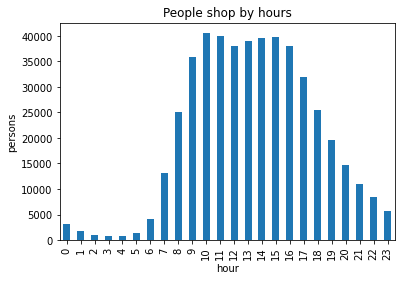

In [66]:
hours_df = orders.groupby("order_hour_of_day")['user_id'].count()
hours_df.plot(kind='bar', title='People shop by hours', xlabel='hour', ylabel='persons')
plt.show()

In [67]:
sum(hours_df[(hours_df.index >= 8) & (hours_df.index <= 18)]) / sum(hours_df)

0.8216752409427249

Most people (82.17%) shop between 8:00 and 18:00

### [A3] What day of the week do people shop for groceries?

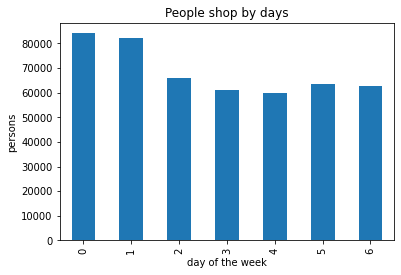

In [68]:
days_df = orders.groupby("order_dow")['user_id'].count()
days_df.plot(kind='bar', title='People shop by days', xlabel='day of the week', ylabel='persons')
plt.show()

In [69]:
(days_df[(days_df.index >= 0) & (days_df.index <= 1)]).mean()

83137.5

In [70]:
(days_df[(days_df.index >= 2) & (days_df.index <= 6)]).mean()

62535.4

In [71]:
(83137.5 - 62535.4) / 62535.4

0.3294470012185098

The average of people shop on day 0 and 1 are greater than other days 32.94%

### [A4] How long do people wait until placing another order?

In [72]:
orders.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0


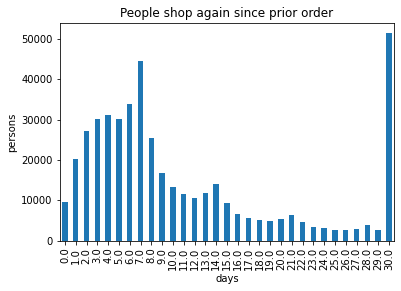

In [73]:
prior_order_df = orders.groupby("days_since_prior_order")['user_id'].count()
prior_order_df.plot(kind='bar', title='People shop again since prior order', xlabel='days', ylabel='persons')
plt.show()

In [74]:
sum(prior_order_df[prior_order_df.index < 8]) / sum(prior_order_df[prior_order_df.index <= 30])

0.5037133304453109

In [75]:
sum(prior_order_df[prior_order_df.index == 30]) / sum(prior_order_df[prior_order_df.index <= 30])

0.11404800781987626

Half customers (50.37%) shop again in a week. 

There are two peak values at the 30th day and the 7th day. 

For the former, I assume customers tend to purchase certain products once a month. But if the range of 'days' was extend to more than 30, and there was still have a extreme value at the 30th day, it will has more convincible。

For the latter. I think this proof the loop that there are more customers at day 0 and 1.

In [76]:
print(orders['days_since_prior_order'].min(), orders['days_since_prior_order'].max())

0.0 30.0


The minimum of 'days_since_prior_order' is 0, which is customer purchase more than one product at the same day. The maximum value is 30 days and which has extreme number of people, we assume that this value has combined those greater than 30 days.

# [B] Medium (must complete all to pass)

### [B1] Is there a difference in `'order_hour_of_day'` distributions on Wednesdays and Saturdays? Plot the histograms for both days and describe the differences that you see.

In [77]:
orders.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0


In [78]:
wed_order = orders[orders['order_dow'] == 3]
sat_order = orders[orders['order_dow'] == 6]

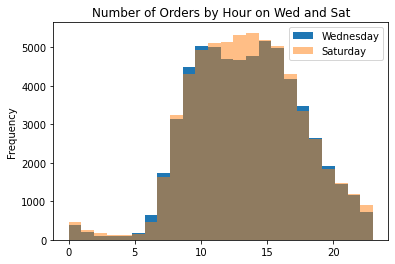

In [79]:
wed_order['order_hour_of_day'].plot(kind='hist', bins=24, title='Number of Orders by Hour on Wed and Sat', xlabel='hour')
sat_order['order_hour_of_day'].plot(kind='hist', bins=24, alpha=0.5)
plt.legend(['Wednesday', 'Saturday'])
plt.show()

In [80]:
len(wed_order) / len(sat_order)

0.9720346693482738

In absolutive amount orders of Wednesday and Saturday, they are almost the same, the amount of orders of Wednesday is 97.2% orders of Saturday. We can see from the histgram above that they are overlaped even every hour. However there are difference at noon, in particular between 12:00-14:00, the order number of Saturday is greater than Wednesday significantly.

### [B2] What's the distribution for the number of orders per customer?

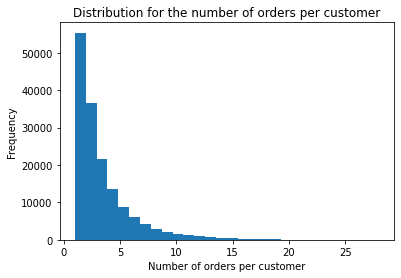

In [81]:
user_order_df = orders.groupby('user_id')['order_id'].count()
ax = user_order_df.plot(kind='hist', bins=28, title='Distribution for the number of orders per customer')
ax.set_xlabel("Number of orders per customer")
plt.show()

In [82]:
len(user_order_df[(user_order_df == 2) | (user_order_df == 1)]) / len(user_order_df)

0.583503242566868

More than half customers (58.35%) purchase 1-2 times.

### [B3] What are the top 20 popular products (display their id and name)?

In [83]:
order_products.head()

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17,0
1,567889,1560,1,1
2,2261212,26683,1,1
3,491251,8670,35,1
4,2571142,1940,5,1


In [84]:
top_20_id = order_products['product_id'].value_counts()[:20].reset_index()
top_20_id.rename(columns={'index': 'product_id', 'product_id': 'number of being ordered'}, inplace=True)
top_20_id

,product_id,number of being ordered
0,24852,66050
1,13176,53297
2,21137,37039
3,21903,33971
4,47209,29773
5,47766,24689
6,47626,21495
7,16797,20018
8,26209,19690
9,27845,19600


In [85]:
top_20 = top_20_id.merge(products[['product_id', 'product_name']])
top_20

,product_id,number of being ordered,product_name
0,24852,66050,banana
1,13176,53297,bag of organic bananas
2,21137,37039,organic strawberries
3,21903,33971,organic baby spinach
4,47209,29773,organic hass avocado
5,47766,24689,organic avocado
6,47626,21495,large lemon
7,16797,20018,strawberries
8,26209,19690,limes
9,27845,19600,organic whole milk


The most popular product is banana.



# [C] Hard (must complete at least two to pass)

### [C1] How many items do people typically buy in one order? What does the distribution look like?

In [86]:
order_products.head()

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17,0
1,567889,1560,1,1
2,2261212,26683,1,1
3,491251,8670,35,1
4,2571142,1940,5,1


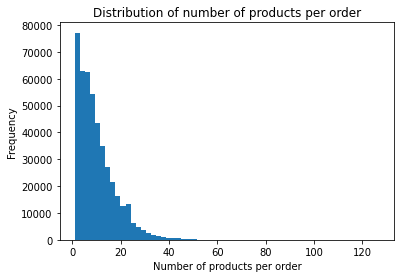

In [87]:
products_per_order = order_products.groupby('order_id')['product_id'].count()
ax = products_per_order.plot(kind='hist', bins=60, title='Distribution of number of products per order')
ax.set_xlabel("Number of products per order")
#ax.set_xlim([0, 40])
plt.show()

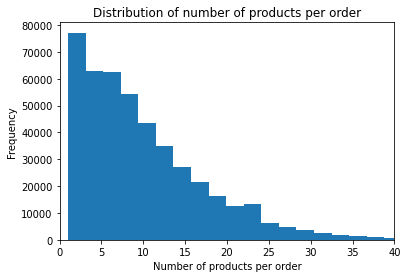

In [88]:
ax = products_per_order.plot(kind='hist', bins=60, title='Distribution of number of products per order')
ax.set_xlabel("Number of products per order")
ax.set_xlim([0, 40])
plt.show()

In [89]:
len(products_per_order[products_per_order <= 20]) / len(products_per_order)

0.9052341316221009

I made two plots to show the distribution of number of products per order. The first one is the full range for all orders. We can see most of orders contain less than 20 products. To zoom in the area where most data located, I made the second plot and set the x-axis limit to 40 products per order. We can also get the same conclusion that 90.52% of orders contain equal and less than 20 products.

### [C2] What are the top 20 items that are reordered most frequently (display their names and product IDs)?

In [90]:
reorder_df = order_products[order_products['reordered'] == 1]
top_20_reorder_id = reorder_df['product_id'].value_counts()[:20].reset_index()
top_20_reorder_id.rename(columns={'index': 'product_id', 'product_id': 'number of being reordered'}, inplace=True)
top_20_reorder_id

,product_id,number of being reordered
0,24852,55763
1,13176,44450
2,21137,28639
3,21903,26233
4,47209,23629
5,47766,18743
6,27845,16251
7,47626,15044
8,27966,14748
9,16797,13945


In [91]:
top_20_reorder = top_20_reorder_id.merge(products[['product_id', 'product_name']])
top_20_reorder

,product_id,number of being reordered,product_name
0,24852,55763,banana
1,13176,44450,bag of organic bananas
2,21137,28639,organic strawberries
3,21903,26233,organic baby spinach
4,47209,23629,organic hass avocado
5,47766,18743,organic avocado
6,27845,16251,organic whole milk
7,47626,15044,large lemon
8,27966,14748,organic raspberries
9,16797,13945,strawberries


In [92]:
diff = top_20_reorder[~top_20_reorder["product_id"].isin(top_20["product_id"])]
diff

,product_id,number of being reordered,product_name
19,49235,8389,organic half & half


The top 20 products and top 20 reordered products are almostly same, except one product.

### [C3] For each product, what proportion of its orders are reorders?

In [93]:
order_products.head()

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17,0
1,567889,1560,1,1
2,2261212,26683,1,1
3,491251,8670,35,1
4,2571142,1940,5,1


In [94]:
proportion_table = pd.pivot_table(order_products, index='product_id', columns='reordered', values='order_id', aggfunc='count')
proportion_table.rename(columns={0: 'First time order', 1: 'Reordered'}, inplace=True)
proportion_table = proportion_table.fillna(0)
proportion_table['Reordered Proportion (%)'] = (proportion_table['Reordered'] / (proportion_table['Reordered']+proportion_table['First time order'])) * 100
proportion_table = proportion_table.drop(['First time order', 'Reordered'], axis=1)
proportion_table

reordered,Reordered Proportion (%)
product_id,
1,56.428571
2,0.000000
3,73.809524
4,51.020408
7,50.000000
...,...
49690,80.000000
49691,43.055556
49692,41.666667


In [95]:
proportion_table = pd.merge(proportion_table, products[['product_id', 'product_name']], on='product_id', how='left')

proportion_table

,product_id,Reordered Proportion (%),product_name
0,1,56.428571,chocolate sandwich cookies
1,2,0.000000,all-seasons salt
2,3,73.809524,robust golden unsweetened oolong tea
3,4,51.020408,smart ones classic favorites mini rigatoni wit...
4,7,50.000000,pure coconut water with orange
...,...,...,...
45568,49690,80.000000,high performance energy drink
45569,49691,43.055556,original pancake & waffle mix
45570,49692,41.666667,organic instant oatmeal light maple brown sugar
45571,49693,44.000000,spring water body wash


### [C4] For each customer, what proportion of their products ordered are reorders?

In [96]:
order_products.head()

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17,0
1,567889,1560,1,1
2,2261212,26683,1,1
3,491251,8670,35,1
4,2571142,1940,5,1


In [97]:
print(orders.shape, order_products.shape)

(478952, 6) (4545007, 4)


In [98]:
orders.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0


In [99]:
order_user_product = orders[['order_id', 'user_id']].merge(order_products[['order_id', 'product_id', 'reordered']],
                              left_on='order_id', right_on='order_id', how='left')
order_user_product

,order_id,user_id,product_id,reordered
0,1515936,183418,19048.0,1.0
1,1515936,183418,47766.0,1.0
2,1515936,183418,45066.0,0.0
3,1515936,183418,24082.0,0.0
4,1515936,183418,24363.0,0.0
...,...,...,...,...
4573908,2071924,1730,1503.0,0.0
4573909,2071924,1730,4778.0,1.0
4573910,2071924,1730,11512.0,1.0
4573911,2071924,1730,4920.0,1.0


In [100]:
user_reorder = pd.pivot_table(order_user_product, index='user_id', columns='reordered', values="order_id", aggfunc='count')
user_reorder.rename(columns={0: 'First time order', 1: 'Reordered'}, inplace=True)
user_reorder = user_reorder.fillna(0)
user_reorder['Reordered Proportion (%)'] = (user_reorder['Reordered'] / (user_reorder['Reordered']+user_reorder['First time order'])) * 100
user_reorder = user_reorder.drop(['First time order', 'Reordered'], axis=1)


user_reorder

reordered,Reordered Proportion (%)
user_id,
2,3.846154
4,0.000000
5,66.666667
6,0.000000
7,92.857143
...,...
206203,22.222222
206206,71.428571
206207,89.130435


### [C5] What are the top 20 items that people put in their carts first? 

In [101]:
order_products.head()

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17,0
1,567889,1560,1,1
2,2261212,26683,1,1
3,491251,8670,35,1
4,2571142,1940,5,1


In [102]:
first_cart = order_products[order_products['add_to_cart_order'] == 1]
top_20_cart_id = first_cart['product_id'].value_counts()[:20].reset_index()
top_20_cart_id.rename(columns={'index': 'product_id', 'product_id': 'number of times'}, inplace=True)

In [103]:
top_20_cart = top_20_cart_id.merge(products[['product_id', 'product_name']], on='product_id', how='left')
top_20_cart

,product_id,number of times,product_name
0,24852,15562,banana
1,13176,11026,bag of organic bananas
2,27845,4363,organic whole milk
3,21137,3946,organic strawberries
4,47209,3390,organic hass avocado
5,21903,3336,organic baby spinach
6,47766,3044,organic avocado
7,19660,2336,spring water
8,16797,2308,strawberries
9,27966,2024,organic raspberries


In [104]:
merged_df = top_20.merge(top_20_reorder, on='product_id', 
                         how='outer').merge(top_20_cart, 
                                            on='product_id', how='outer')
merged_df

,product_id,number of being ordered,product_name_x,number of being reordered,product_name_y,number of times,product_name
0,24852,66050.0,banana,55763.0,banana,15562.0,banana
1,13176,53297.0,bag of organic bananas,44450.0,bag of organic bananas,11026.0,bag of organic bananas
2,21137,37039.0,organic strawberries,28639.0,organic strawberries,3946.0,organic strawberries
3,21903,33971.0,organic baby spinach,26233.0,organic baby spinach,3336.0,organic baby spinach
4,47209,29773.0,organic hass avocado,23629.0,organic hass avocado,3390.0,organic hass avocado
5,47766,24689.0,organic avocado,18743.0,organic avocado,3044.0,organic avocado
6,47626,21495.0,large lemon,15044.0,large lemon,1737.0,large lemon
7,16797,20018.0,strawberries,13945.0,strawberries,2308.0,strawberries
8,26209,19690.0,limes,13327.0,limes,1370.0,limes
9,27845,19600.0,organic whole milk,16251.0,organic whole milk,4363.0,organic whole milk


**General Conclusion:**

There are high redundancy between these 3 data frames (top_20_product, top_20_reorder, and top_20_cart), we only use 27 products to cover all top lists. Especially top_20_product and top_20_reorder, they are almost the same except one product even the order of purchase times, which shows they two have strong positive correlationship. There are 6 products in top_20_cart which not in other data frames.

For specific products, the top 8 products (regular and organic) are banana, strawberry, baby spinach, avocado, lemon and lime, respberry, onion and whole milk. 18 organic products out of total 27 products. Customers perfer hava a healthy life.